# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
import seaborn as sns

from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Users\Jon\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


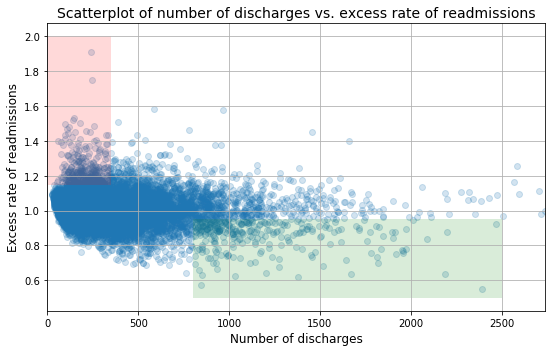

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [5]:
# Take a look at the variables included in the hospital data.
clean_hospital_read_df.columns.values

array(['Hospital Name', 'Provider Number', 'State', 'Measure Name',
       'Number of Discharges', 'Footnote', 'Excess Readmission Ratio',
       'Predicted Readmission Rate', 'Expected Readmission Rate',
       'Number of Readmissions', 'Start Date', 'End Date'], dtype=object)

# Question A:
I agree with the graphical validity of above analysis, but would like to assert it statistically, and disagree with the recommendations. The graphical analysis properly showcases the slight downwards trend, but most importantly highlights areas of concern. Higher readmisson rates exist at the hospitals with the lowest number of discharges while the lower rates exist amongst those with the highest number of discharges. However, some important information is missing, including: Duration of patient stay, whether or not the hospital is in a major population center, number of procedures performed on the paitent, and the type of hospital (A primary care facility will have far more discharges than one that specializes in a specific operating precedure). All of these variables can contribute to number of discharges at the different hospitals. 

To be fair, the analysis does not completely disregard these concerns as the scatterplot shows a large number of hospitals with less than 500 discharges that have acceptable ( < 1.0 ) readmittance rates. That being said, the recommendations do seem to ignore these cases. My recommendations before continuing analysis would be:

1.) Collect data (if legal to do so) regarding: Duration of stay, number and type or procedures, city and state (state is given), condition being treated, and whether or not the hospital is a general hospital or if it is specialized. This important data would allow us to determine the root causes of readmission and more accurately construct requirements for hospitals to meet in order to continue operation.

2.) While the consolidation of hospitals would certainly make sense in some locales such as major city centers, it could lead to paitents in more remote areas without reasonably local access to quality care. Taking rural New England for example, Boston is a major city center with massive hospital such as Mass General Hospital that can serve thousands upon thousands of residents. Consolidation within the city of Boston could allow Mass General to improve the facilities of other local hospitals and improve the care for the city as a whole. Now consider the indiviuals living in rural eastern New Hampshire. Without smaller local hospitals these patients would need to take multiple hour drives to reach what could be critical care. This becomes a complex location optimization problem best left to Industrial engineering and operations experts. 

# Question B: 
Conduct a two sample hypothesis test to test the null hypothesis that the two groups (hospitals with fewer than 100 discharges and hospitals with more than 1000 discharges) have the similar mean readmission rates. The alternative hypothesis is that the readmission rates of the two groups have different means (this is what the inital analysis claims.) 

In [6]:
# Implement the bootstrapping functions from the Datacamp Course: Statistical Thinking in Python (Part 1)
# Author: Justin Bois
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

# Implement the bootstrapping functions from the Datacamp Course: Statistical Thinking in Python (Part 2)
# Author: Justin Bois
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates
##
# End of section from Justin Bois's Datacamp course
##



# Questions 1 & 2:

p-value = 0.0
Since the p value is below 0.05 we reject the null hypothesis


Values outside of the range:  [ 0.912396   1.3286565]  are considered abnormal for small hospitals
Values outside of the range:  [ 0.628835  1.261978]  are considered abnormal for large hospitals


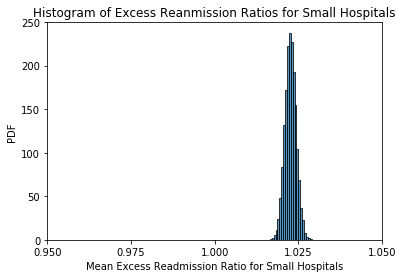

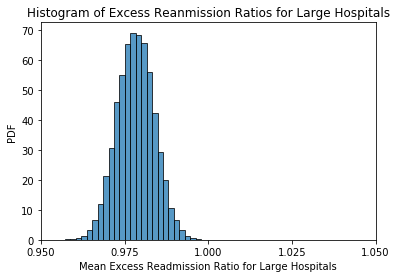

The two sample z score is:  -6.105791867221887
The z test result is:  1.0229223814e-09
As this value is far below 0.01 we reject the null hypothesis and accept the alternative hypothesis


Mean Excess Readmission Ratio for small hospitals:  1.0226183501683506
Mean Excess Readmission Ratio for large hospitals:  0.9783354211663071


Std of Excess Readmission Ratio for small hospitals:  0.05795419632801004
Std of Excess Readmission Ratio for large hospitals:  0.11987768585552241


In [7]:

# Test if small and large hospitals have similar mean Excess Readmission Ratios.
# Null hypothesis: Both small and large hospitals have similar mean and Excess Readmission Ratios

# Rename dataframe
df = clean_hospital_read_df

# small_hos = df.loc[ (df['Number of Discharges'] < 100) & (df['Excess Readmission Ratio'] != NaN)]
# small_hos = df.loc[df['Number of Discharges'] < 100].
# This eliminaites all of the hospitals with no discharges and no Excess Readmission Ratio.

small_hos_df = df.loc[ (df['Number of Discharges'] < 100) & (df['Number of Discharges'] != 0)]
large_hos_df = df.loc[ (df['Number of Discharges'] > 1000)]


# Make arrays of the Excess Readmission Ratio
small_hos = small_hos_df['Excess Readmission Ratio']
large_hos = large_hos_df['Excess Readmission Ratio']

# Find the mean and standard deviations
mu_s = np.mean(small_hos)
sigma_s = np.std(small_hos)

mu_l = np.mean(large_hos)
sigma_l = np.std(large_hos)


# Caluculate the difference in means
mean_diff = mu_l - mu_s


# Concatenate body temperatures: temp_concat
hos_concat = np.concatenate((large_hos, small_hos))

# Initialize bootstrap replicates: bs_replicates
bs_replicates = np.empty(10000)

for i in range(10000):
    # Generate bootstrap sample
    bs_sample = np.random.choice(hos_concat, size=len(hos_concat))
    
    # Compute replicate
    bs_replicates[i] = np.mean(bs_sample[:len(large_hos)]) - np.mean(
                                     bs_sample[len(small_hos):])

# Compute and print p-value: p
p = np.sum(bs_replicates <= mean_diff) / len(bs_replicates)
print('p-value =', p)
print('Since the p value is below 0.05 we reject the null hypothesis')
print('\n')

# Calculate confidence interval 
# Calculate and plot standard error of the mean
bs_small_hos_reps = draw_bs_reps(small_hos, np.mean, 10000)
bs_large_hos_reps = draw_bs_reps(large_hos, np.mean, 10000)

# Compute the 95% confidence interval: conf_int
small_conf_int = np.percentile(small_hos, [0.5, 99.5])
large_conf_int = np.percentile(large_hos, [0.5, 99.5])

# Print the confidence interval
print('Values outside of the range: ', small_conf_int, ' are considered abnormal for small hospitals')
print('Values outside of the range: ', large_conf_int, ' are considered abnormal for large hospitals')



# Compute standard error of the mean 
# Calculate and plot standard error of the mean for small hospitals
bs_s_reps = draw_bs_reps(small_hos, np.mean, 10000)
s_sem = np.std(small_hos) / np.sqrt(len(small_hos))
bs_s_std = np.std(bs_s_reps)
# print(bsTemp_b_std)

plt.title('Histogram of Excess Reanmission Ratios for Small Hospitals')
plt.hist(bs_s_reps, bins = 25, normed = True, alpha=0.75, histtype='bar', ec='black')
plt.xlabel('Mean Excess Readmission Ratio for Small Hospitals')
plt.xticks(np.arange(0.950, 1.050, step=0.025))
plt.ylabel('PDF')
plt.show()
plt.clf()


# Calculate and plot standard error of the mean for large hospitals
bs_l_reps = draw_bs_reps(large_hos, np.mean, 10000)
l_sem = np.std(large_hos) / np.sqrt(len(large_hos))
bs_l_std = np.std(bs_l_reps)
# print(bsTemp_b_std)

plt.title('Histogram of Excess Reanmission Ratios for Large Hospitals')
plt.hist(bs_l_reps, bins = 25, normed = True, alpha=0.75, histtype='bar', ec='black')
plt.xlabel('Mean Excess Readmission Ratio for Large Hospitals')
plt.xticks(np.arange(0.950, 1.050, step=0.025))
plt.ylabel('PDF')
plt.show()
plt.clf()


# Compute mean and standard deviation: mu, sigma
mu_s = np.mean(small_hos)
sigma_s = np.std(small_hos)
n_s = len(small_hos)

mu_l = np.mean(large_hos)
sigma_l = np.std(large_hos)
n_l = len(large_hos)

# Compute the two sample z test (delta = 0)
z = (mu_l - mu_s - 0) / ( (((sigma_l**2)/n_l)**0.5) + (((sigma_s**2)/n_s)**0.5) )   
print('The two sample z score is: ', z)

from scipy import stats
# Multiply by two for the two tailed test
z_result = stats.norm.sf(abs(z))*2

print('The z test result is: ', z_result)
print('As this value is far below 0.01 we reject the null hypothesis and accept the alternative hypothesis')

print('\n')
print('Mean Excess Readmission Ratio for small hospitals: ', mu_s)
print('Mean Excess Readmission Ratio for large hospitals: ', mu_l)
print('\n')
print('Std of Excess Readmission Ratio for small hospitals: ', sigma_s)
print('Std of Excess Readmission Ratio for large hospitals: ', sigma_l)


# Question 3: 
As the p value is 0.0 we can still reject the null hypothesis with significance level of α = 0.01 

# Question 4
Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?

The statisical significance is sound. The different sizes of hospitals certainly have different means. However, the practical significance of the information is somewhat diminished by the lack of additional data mentioned prior. Specifically, we would look for information regarding: Which procedures were performed on readmitted patients, was the hospital specialized, where (both city and state) was the hospital located, and how long was the patient was at the hospital. In terms of changing the recommendations let's look at them one at a time:

1.) Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.

As can be seen in the initial plot, a large number of hospitals with capacity under 300 provided quality care without increasing resource allocation. So I would adapt this requirement to only apply to hospitals at or beyond the acceptable readmittance ratio. 

2.) Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

I would only consider this recommendation in regions with a large number of hospitals per county. Otherwise relative costs for small hospitals would soar and make their continued operation difficult. 

# Question 5

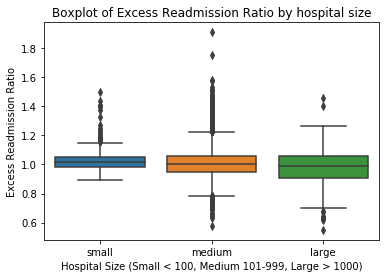

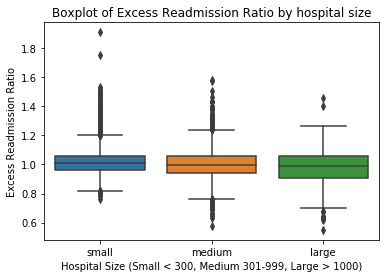

In [44]:
# Make a swarmplot for small hospitals and large hospitals

# Create a new data frame with columns size and Excess Readmission Ratio, where size is small or large
# depending on if the data originated from small_hos or large_hos
# if Number of Discharges < 100 -> small
# if Number of Discharges > 100 & < 1000 medium
# if Number of Discharges > 1000 -> large

small_hos_df  = df.loc[ (df['Number of Discharges'] < 100) & (df['Number of Discharges'] != 0)]
medium_hos_df = df.loc[ (df['Number of Discharges'] > 100) & (df['Number of Discharges'] <= 1000)]
large_hos_df  = df.loc[ (df['Number of Discharges'] > 1000)]


# Make arrays of the Excess Readmission Ratio
small_hos  = small_hos_df['Excess Readmission Ratio']
medium_hos = medium_hos_df['Excess Readmission Ratio']
large_hos  = large_hos_df['Excess Readmission Ratio']


# Create an empty list to append to and add to the dataframe
Size = list()

for i in range(len(df)):
    if df.iloc[i,4] <= 100:
        Size.append('small')
    elif df.iloc[i,4] > 1000:
        Size.append('large')
    else:
        Size.append('medium')

# Add the size column to the data fram
df['Size'] = Size
sns.boxplot(x="Size", y="Excess Readmission Ratio", data=df);
plt.title('Boxplot of Excess Readmission Ratio by hospital size')
plt.xlabel('Hospital Size (Small < 100, Medium 101-999, Large > 1000)')
plt.ylabel('Excess Readmission Ratio')
plt.show()
plt.clf()

# Redo the section with small being < 300

# Create an empty list to append to and add to the dataframe
Size2 = list()

for i in range(len(df)):
    if df.iloc[i,4] <= 300:
        Size2.append('small')
    elif df.iloc[i,4] > 1000:
        Size2.append('large')
    else:
        Size2.append('medium')

# Add the size column to the data fram
df['Size'] = Size2

sns.boxplot(x="Size", y="Excess Readmission Ratio", data=df);
plt.title('Boxplot of Excess Readmission Ratio by hospital size')
plt.xlabel('Hospital Size (Small < 300, Medium 301-999, Large > 1000)')
plt.show()
plt.clf()

These plots show that the means of Excess Readmission Ratio for the different sizes of hospials are fairly similar. But the quartile range increases as the size of the hospital increases. Important to note is that the small hospitals have so many outliers that the box plot becomes less useful for those hospitals, and that those hospitals should be brought under scrutiny by whatever regulator organization is at power within the industry. But the tight quartile range in case of the small hospitals shows that small hospitals do not necessarily provide worse care for the patient.